In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize, rotate
import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls archive/animal_crossing

0177myxmpiq41.jpg  95itt33yxdv41.jpg  i3ymm53373j41.jpg  qlpr7h1rprz41.jpg
05tmnohw0qn41.png  95senj68juz41.jpg  i5bcwpwrput41.jpg  qrb8pebthjj41.jpg
06wprmd2m7u41.jpg  9f1ncxkdrtp41.jpg  i6oj6w5grmt41.jpg  qu6ezf8n63o41.png
07nqetuqw9w41.jpg  9f43oniyalr41.jpg  iPq1MWC.jpg        qvlu1yrvfvi41.jpg
07xjd27c8uy41.jpg  9ic44op0xyu41.jpg  icmdhvjbxcs41.jpg  r0a61jwuaul41.jpg
086tektpmp051.jpg  9kfeii1ods051.jpg  idhi876mjlu41.jpg  r6g5hc8mdfw41.jpg
0czcmw8rmsz41.jpg  9md0uw7o5ty41.png  idzk49t876y41.jpg  r7wlkpp05mt41.jpg
0d95wo29cl051.jpg  9mm78thz7jz41.jpg  ieTOCu2.jpg        r9gk9rwhkvr41.jpg
0f348gu5nuk41.jpg  9nkshyrrm0u41.jpg  igk5q7v9yqy41.jpg  raklbu2zaa051.jpg
0gdakfpl6bh41.jpg  9qfgjoud73s41.jpg  igkzapdeyut41.jpg  raosv2hyz6s41.jpg
0htu1r0l35y41.jpg  9s3q7mmyed051.jpg  ij7kzf2x91p41.jpg  rbh7oe3eki151.jpg
0iycgvopjqp41.jpg  9ws1onrchqu41.jpg  imeso89033q41.jpg  rco3861hcuv41.jpg
0jun1e5etxu41.jpg  9y8d7j0n1w151.jpg  inu4ftn88fs41.jpg  rd84fbs31pu41.jpg
0k85pi0eqd151.jpg  9z7t24

In [3]:
acnh_im_list=os.listdir('archive/animal_crossing')

In [4]:
doom=pd.read_csv('archive/doom_crossing_dataset.csv')
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')

In [5]:
index=pd.Index(acnh['id'])
acnh_votes=pd.DataFrame(acnh['ups']).set_index(index)
acnh_comments=pd.DataFrame(acnh['upvote_ratio']).set_index(index)
acnh_awards=pd.DataFrame(acnh['total_awards_received']).set_index(index)
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index)

In [6]:
index=pd.Index(doom['id'])
doom_votes=pd.DataFrame(doom['ups']).set_index(index)
doom_comments=pd.DataFrame(doom['upvote_ratio']).set_index(index)
doom_awards=pd.DataFrame(doom['total_awards_received']).set_index(index)
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index)

In [7]:
doom_im_list=os.listdir('archive/doom')

In [8]:
doom_im_list

['1869awy2j1p41.jpg',
 '3vtmpbso10w11.jpg',
 'y2aohqgeggp21.jpg',
 'zq983ilrwza41.jpg',
 'zu1roax75lr41.png',
 'koe437qc97v41.jpg',
 'fsgfpkqclcj31.jpg',
 's2cqf8vm9wz41.jpg',
 'dxa8086pwdb41.jpg',
 'uaftik944w941.jpg',
 '3orpc5p97to41.png',
 '4xdnyq2yb3k31.jpg',
 'tl5mquu4l9j41.jpg',
 'ehh0c9wo3lk31.jpg',
 '1snibvl6zpp41.jpg',
 'yelzbyp8cwp41.png',
 'svztqowhxbo41.jpg',
 'wflxqgz693h31.jpg',
 '3z7tpqi98et41.jpg',
 '8iOjAWe.jpg',
 'wk5mpgf8t9u41.jpg',
 '078yxwtp4gc41.png',
 'lv7wi59wjgs41.jpg',
 'veS4M8Y.jpg',
 'ha6664k810941.jpg',
 'zc7wdrmplrn41.jpg',
 'GrO4p9J.png',
 'rnzbczz6e9c41.jpg',
 '5ccvhjp6jhk41.jpg',
 'hltdmjdplh531.jpg',
 'ZoF3TSk.png',
 'g110bc1iluo41.png',
 '93oamcvfewu31.png',
 'h9nkiyuo89y41.jpg',
 'gjxuptnt17t41.png',
 'ots2pux9s7q41.jpg',
 'wuw4g2c9xbt41.jpg',
 '8wr5wde41ht41.jpg',
 'hdqewawan9p41.jpg',
 'fdqsbwz658z41.jpg',
 'gpmq2vu9s7q41.jpg',
 '96d2rfs8mh431.jpg',
 '4ktzur47yac31.png',
 '34a2yor313251.jpg',
 '7gh14vki09p41.jpg',
 'ezfhxms42ar41.jpg',
 'nddr4q3fzj

In [47]:
doom_shape=[]
for idx in range(len(doom_im_list)):
    pic=io.imread('archive/doom/'+doom_im_list[idx])
    x,y,z=pic.shape
    doom_shape.append([x,y,z])

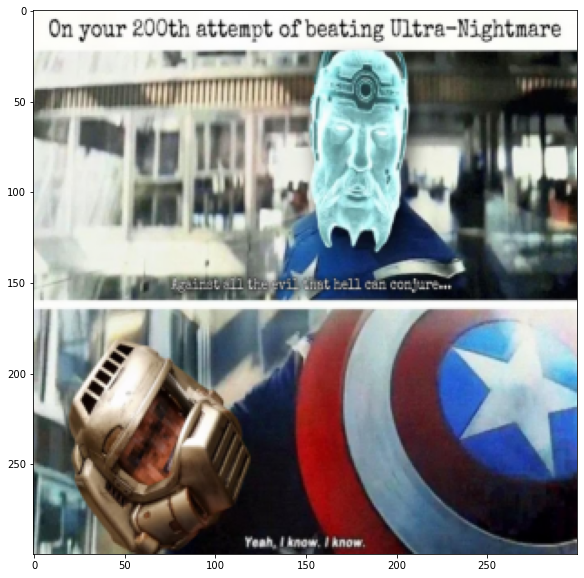

In [89]:
fig, ax=plt.subplots(figsize=(10,10))
pic_sm=resize(pic, (300, 300, 3), anti_aliasing=True)
ax.imshow(pic_sm)
size=np.array((300, 300, 3))
io.imsave('test.jpg', pic)

In [91]:
rm test.jpg

In [49]:
np.array(doom_shape[0])

array([1339, 1071,    3])

In [52]:
np_doom_shape=np.array([np.array(shape) for shape in doom_shape])

In [40]:
min(doom_shape)

(177, 415, 3)

In [57]:
df_doom_shape=pd.DataFrame(np_doom_shape).set_index(index)

In [58]:
df_doom_shape

,0,1,2
id,,,
gtli3b,1339,1071,3
fnj4e5,475,589,3
gemj1h,639,640,3
fzhpqt,1503,1080,3
g4v23f,2048,1340,4
...,...,...,...
dirl12,480,640,4
fvmlvj,524,750,3
96ps5e,347,640,3


In [62]:
pos={0:'x', 1:'y', 2:'z'}
df_doom_shape.rename(pos, axis=1, inplace=True)

In [63]:
df_doom_shape.describe()

,x,y,z
count,840.000000,840.000000,840.000000
mean,1313.338095,1390.732143,3.160714
std,950.752359,982.542979,0.367486
min,177.000000,230.000000,3.000000
25%,694.750000,750.000000,3.000000
50%,1024.000000,1078.000000,3.000000
75%,1559.500000,1700.000000,3.000000
max,6000.000000,7311.000000,4.000000


In [70]:
df_doom_shape.sort_values(by='y').head(50)

,x,y,z
id,,,
cw34y7,294,230,3
g6uqpa,370,308,3
frfcty,348,334,4
fe6jzv,388,382,3
b6gdat,604,396,3
bt45oc,416,406,3
fx5lqq,884,408,3
fancp0,177,415,3
gftsqb,720,416,3


In [19]:
doom=pd.read_csv('archive/doom_crossing_dataset.csv')
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')

In [71]:
mkdir acnh_small doom_small

In [72]:
mkdir acnh_med doom_med acnh_rep doom_rep acnh_color doom_color

In [92]:
def resize_im(in_folder, out_folder, im_list, size=(300, 300, 3)):
    for im in im_list:
        pic=io.imread(in_folder + im)
        pic_resize=resize(pic, size, anti_aliasing=True)
        io.imsave(out_folder + im, pic_resize)

In [107]:
ls

EDA-IM-DF.ipynb   acnh_rep/         doom_color/       nlp/
EDA-NLP-DF.ipynb  acnh_small/       doom_med/         web_scrape/
README.md         archive/          doom_rep/
acnh_color/       code_snips.ipynb  doom_small/
acnh_med/         cute/             im_process/


In [ ]:
acnh_color doom_color acnh_lines doom_lines

In [10]:
mkdir acnh_32col doom_32col

In [9]:
from skimage.feature import canny
from skimage.restoration import denoise_bilateral
from skimage.restoration import denoise_tv_chambolle
from sklearn.cluster import KMeans

In [35]:
nrow, ncol, k = (1020, 1020, 32)
def colors_only(in_folder, out_folder, im_list, nrow, ncol, k):
    colors=np.zeros((len(im_list), k, 3))
    col_counts=np.zeros((len(im_list), k))
    for idx,im in enumerate(im_list):
        pic=io.imread(in_folder + im)
        pixels=[pic[irow][icol] for irow in range(nrow) for icol in range(ncol)]
        pic_cl=KMeans(n_clusters=k).fit(pixels)
        pic_comp=pic_cl.cluster_centers_[pic_cl.labels_].astype(np.uint8)
        np.int8(pic_comp)
        png=im.replace('jpg', 'png')
        colors[idx]=(pic_cl.cluster_centers_)
        col_counts[idx]=(np.unique(pic_cl.labels_, return_counts=True)[1])
        io.imsave(out_folder + png, pic_comp)

In [36]:
colors_only('acnh_med/', 'acnh_32col', acnh_im_list, nrow, ncol, k)

In [ ]:
acnh_col=pd.DataFrame(colors, index=acnh_im_list, columns=np.arange(k))
acnh_col_counts=pd.DataFrame(col_counts, index=acnh_im_list, columns=np.arange(k))
acnh_col.to_csv()
acnh_col_counts.to_csv()

In [31]:
nrow, ncol, k = (1020, 1020, 32)
#colors=np.zeros((k, 3))
#col_counts=np.zeros((k))
#pic=io.imread('acnh_med/' + acnh_im_list[0])
#pixels=[pic[irow][icol] for irow in range(nrow) for icol in range(ncol)]
#pic_cl=KMeans(n_clusters=k).fit(pixels)
pic_comp=pic_cl.cluster_centers_[pic_cl.labels_].astype(np.int8)
colors=(pic_cl.cluster_centers_)
col_counts=(np.unique(pic_cl.labels_, return_counts=True)[1])
pic_comp=pic_cl.cluster_centers_[pic_cl.labels_].astype(int)

In [27]:
col_counts

array([ 2909, 57431, 68656, 22748, 79657, 75169, 42628, 23727, 10132,
        4865,  8261, 70482, 44253,  8335, 77017,  6590,  3234, 50638,
       30158,  3312, 77587, 16930, 18578,  4750, 44362, 54628, 20040,
        4380,  6937, 51251, 14921, 35834])

In [48]:
df_colors=pd.DataFrame(colors, columns=['red', 'blue', 'green'])
df_colors['counts']=col_counts

In [49]:
df_colors.sort_values(by='red')

,red,blue,green,counts
8,47.776846,37.661271,37.470095,10132
15,57.149469,66.941426,51.002428,6590
26,66.232934,36.878593,32.443064,20040
22,68.279955,49.592744,51.525406,18578
7,81.094196,62.990854,63.233152,23727
9,84.900719,89.337513,63.680164,4865
18,93.891372,72.836196,73.289343,30158
31,104.285120,82.189596,82.837166,35834
3,105.634517,53.100624,39.877220,22748
27,107.574658,110.612100,82.018721,4380


In [147]:
png=acnh_im_list[0].replace('jpg', 'png')
io.imsave('acnh_color/' + png, pic_comp)

Lossy conversion from int64 to uint8. Range [34, 241]. Convert image to uint8 prior to saving to suppress this warning.


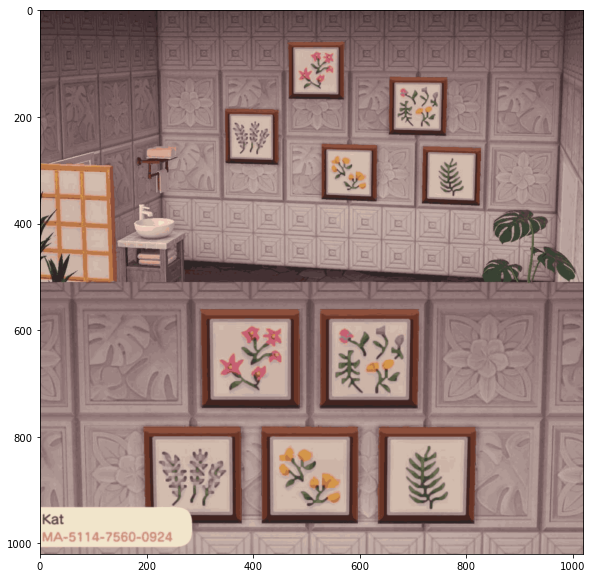

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(pic_comp.reshape(1020,1020,3))

In [150]:
colors_only('doom_med/', 'doom_color/', doom_im_list, nrow, ncol, k)

Lossy conversion from int64 to uint8. Range [17, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [14, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range

Lossy conversion from int64 to uint8. Range [0, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [8, 240]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [17, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [6, 224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0,

Lossy conversion from int64 to uint8. Range [3, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [10, 223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [

Lossy conversion from int64 to uint8. Range [0, 248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [23, 236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3,

Lossy conversion from int64 to uint8. Range [2, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [12, 203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [8, 246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [8, 241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [

Lossy conversion from int64 to uint8. Range [5, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [17, 244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [17, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range 

Lossy conversion from int64 to uint8. Range [12, 235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [19, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [16, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [12, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9

Lossy conversion from int64 to uint8. Range [2, 229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [38, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 240]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5

Lossy conversion from int64 to uint8. Range [3, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [16, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [10, 229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0